In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install yfinance

^C
ERROR: Operation cancelled by user
^C
ERROR: Operation cancelled by user


In [2]:
import numpy as np
import pandas as pd
from matplotlib import style
import datetime
import pandas_datareader.data as web
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import yfinance as yf
import csv

# Define the stock ticker and the date range
ticker = 'BBCA.JK'
start_date = '2010-01-04'
end_date = '2019-12-01'

# Get the data
train_data = yf.download(ticker, start=start_date, end=end_date)

train_data.to_csv('train_data.csv')


# Get the stock data using yahoo API:
# get 2009-2019 data to train our model
#train_data = web.DataReader('BBCA.JK', 'yahoo', datetime.datetime(2010,1,4),datetime.datetime(2019,12,1)) 

# get 2020 data to present date to test the SVM model
# test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,2), datetime.date.today()) 
test_data = yf.download(ticker, start=start_date, end=end_date)
#test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,4), datetime.datetime(2021,12,1)) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1010.0,1010.0,965.0,1010.0,800.359741,77812500
2010-01-05,1020.0,1020.0,990.0,1020.0,808.284119,44442500
2010-01-06,990.0,1020.0,990.0,990.0,784.511169,27782500
2010-01-07,995.0,995.0,965.0,995.0,788.473145,38632500
2010-01-08,970.0,995.0,970.0,970.0,768.662231,27427500
...,...,...,...,...,...,...
2019-11-25,6330.0,6335.0,6275.0,6275.0,5638.059082,55133500
2019-11-26,6330.0,6330.0,6270.0,6285.0,5647.044922,192783500
2019-11-27,6270.0,6300.0,6240.0,6300.0,5660.522949,58833500


In [5]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1010.0,1010.0,965.0,1010.0,800.359741,77812500
2010-01-05,1020.0,1020.0,990.0,1020.0,808.284119,44442500
2010-01-06,990.0,1020.0,990.0,990.0,784.511169,27782500
2010-01-07,995.0,995.0,965.0,995.0,788.473145,38632500
2010-01-08,970.0,995.0,970.0,970.0,768.662231,27427500
...,...,...,...,...,...,...
2019-11-25,6330.0,6335.0,6275.0,6275.0,5638.059082,55133500
2019-11-26,6330.0,6330.0,6270.0,6285.0,5647.044922,192783500
2019-11-27,6270.0,6300.0,6240.0,6300.0,5660.522949,58833500


In [6]:
# sort by date
train_data = train_data.sort_values('Date')
test_data = test_data.sort_values('Date')

# fix the date 
train_data.reset_index(inplace=True)
train_data.set_index("Date", inplace=True)
test_data.reset_index(inplace=True)
test_data.set_index("Date", inplace=True)

In [7]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1010.0,1010.0,965.0,1010.0,800.359741,77812500
2010-01-05,1020.0,1020.0,990.0,1020.0,808.284119,44442500
2010-01-06,990.0,1020.0,990.0,990.0,784.511169,27782500
2010-01-07,995.0,995.0,965.0,995.0,788.473145,38632500
2010-01-08,970.0,995.0,970.0,970.0,768.662231,27427500
...,...,...,...,...,...,...
2019-11-25,6330.0,6335.0,6275.0,6275.0,5638.059082,55133500
2019-11-26,6330.0,6330.0,6270.0,6285.0,5647.044922,192783500
2019-11-27,6270.0,6300.0,6240.0,6300.0,5660.522949,58833500


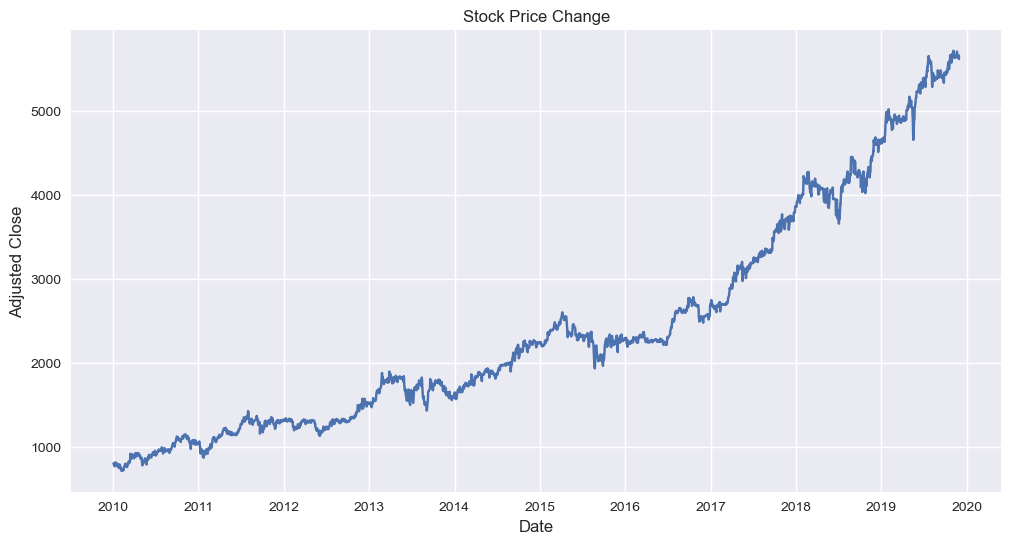

In [8]:
from matplotlib import pyplot as plt

style.use('seaborn')
plt.figure(figsize = (12,6))
plt.plot(train_data["Adj Close"])
plt.title("Stock Price Change")
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Adjusted Close", fontsize = 12)
plt.show()

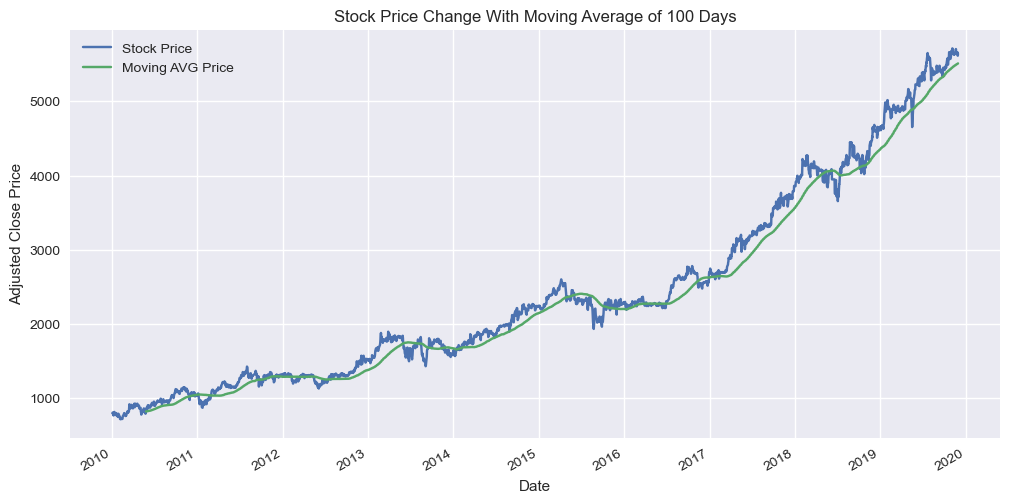

In [9]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg = close_price.rolling(window=100).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 100 Days")
close_price.plot(label='Stock Price')
moving_avg.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

In [10]:
import matplotlib.dates as mdates

# change the dates into ints for training 
indxed_dates = train_data.copy()
indxed_dates = indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
actual_dates = indxed_dates['Date']

# convert to ints
indxed_dates['Date'] = indxed_dates['Date'].map(mdates.date2num)

indxed_dates

,Date,Open,High,Low,Close,Adj Close,Volume
0,14613.0,1010.0,1010.0,965.0,1010.0,800.359741,77812500
1,14614.0,1020.0,1020.0,990.0,1020.0,808.284119,44442500
2,14615.0,990.0,1020.0,990.0,990.0,784.511169,27782500
3,14616.0,995.0,995.0,965.0,995.0,788.473145,38632500
4,14617.0,970.0,995.0,970.0,970.0,768.662231,27427500
...,...,...,...,...,...,...,...
2466,18225.0,6330.0,6335.0,6275.0,6275.0,5638.059082,55133500
2467,18226.0,6330.0,6330.0,6270.0,6285.0,5647.044922,192783500
2468,18227.0,6270.0,6300.0,6240.0,6300.0,5660.522949,58833500
2469,18228.0,6295.0,6295.0,6245.0,6250.0,5615.598145,44248000


In [11]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates_data = indxed_dates['Date'].to_numpy()
prices_data = train_data['Adj Close'].to_numpy()

#Convert to 1d Vector
dates_data = np.reshape(dates_data, (len(dates_data), 1))
prices_data = np.reshape(prices_data, (len(prices_data), 1))

In [12]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1e4))
SVR_linear.fit(dates_data, prices_data)
SVR_linear_train = SVR_linear.predict(dates_data)

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
SVR_linear_train

array([ 482.89917208,  483.91792761,  484.93668313, ..., 4164.68162979,
       4165.70038531, 4166.71914082])

In [14]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e4, gamma= 0.1)
SVR_rbfk.fit(dates_data, prices_data)
SVR_rbfk_train = SVR_rbfk.predict(dates_data)

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
SVR_rbfk_train

array([ 800.45922218,  799.10251319,  798.59893829, ..., 5660.42316592,
       5680.46218384, 5642.45273487])

In [16]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=3, epsilon=0.1, coef0=1))
SVR_poly.fit(dates_data, prices_data)
SVR_poly_train = SVR_poly.predict(dates_data)

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
SVR_poly_train

array([ 734.63906943,  735.76116317,  736.88212646, ..., 5794.82016851,
       5798.8213262 , 5802.82520868])

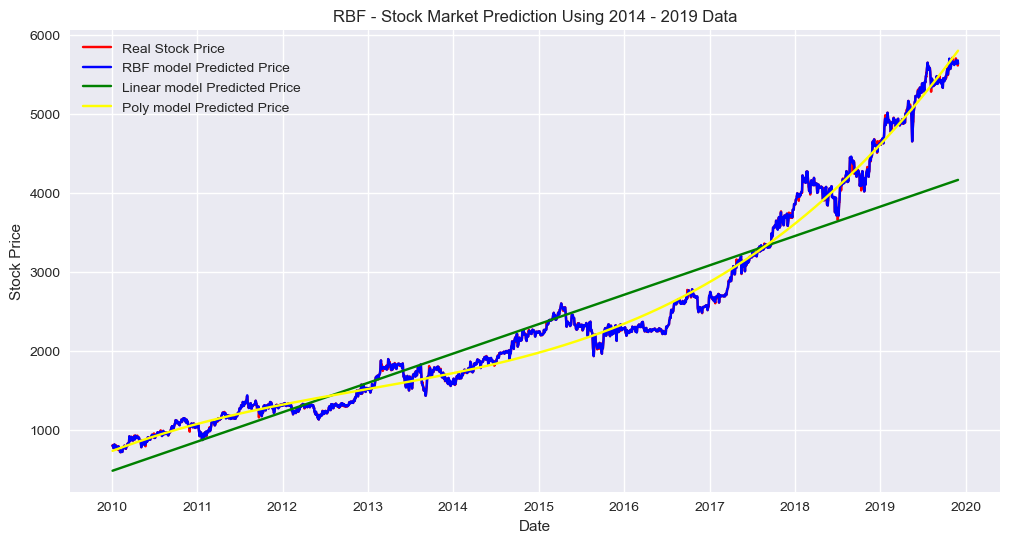

In [18]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2014 - 2019 Data')
plt.plot(dates_data, prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(actual_dates, SVR_rbfk_train, color= 'blue', label= 'RBF model Predicted Price') 
plt.plot(actual_dates, SVR_linear_train, color= 'green', label= 'Linear model Predicted Price') 
plt.plot(actual_dates, SVR_poly_train, color= 'yellow', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [19]:
# change the dates into ints for training 
test_indxed_dates = test_data.copy()
test_indxed_dates = test_indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
test_actual_dates = test_indxed_dates['Date']

# convert to ints
test_indxed_dates['Date'] = test_indxed_dates['Date'].map(mdates.date2num)

In [20]:
test_indxed_dates

,Date,Open,High,Low,Close,Adj Close,Volume
0,14613.0,1010.0,1010.0,965.0,1010.0,800.359741,77812500
1,14614.0,1020.0,1020.0,990.0,1020.0,808.284119,44442500
2,14615.0,990.0,1020.0,990.0,990.0,784.511169,27782500
3,14616.0,995.0,995.0,965.0,995.0,788.473145,38632500
4,14617.0,970.0,995.0,970.0,970.0,768.662231,27427500
...,...,...,...,...,...,...,...
2466,18225.0,6330.0,6335.0,6275.0,6275.0,5638.059082,55133500
2467,18226.0,6330.0,6330.0,6270.0,6285.0,5647.044922,192783500
2468,18227.0,6270.0,6300.0,6240.0,6300.0,5660.522949,58833500
2469,18228.0,6295.0,6295.0,6245.0,6250.0,5615.598145,44248000


In [21]:
test_dates_data = test_indxed_dates['Date'].to_numpy()
test_prices_data = test_data['Adj Close'].to_numpy()

#Convert to 1d Vector
test_dates_data = np.reshape(test_dates_data, (len(test_dates_data), 1))
test_prices_data = np.reshape(test_prices_data, (len(test_prices_data), 1))

In [22]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
SVR_rbfk.fit(test_dates_data, test_prices_data)
SVR_rbfk_test = SVR_rbfk.predict(test_dates_data)
SVR_rbfk_test

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 937.78814174,  808.38414627,  784.41085785, ..., 5660.42255036,
       5439.03898732, 4955.63935163])

In [23]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1))
SVR_linear.fit(test_dates_data, test_prices_data)
SVR_linear_test =  SVR_linear.predict(test_dates_data)
SVR_linear_test

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 764.82577114,  765.61781304,  766.40985495, ..., 3627.26521473,
       3628.05725664, 3628.84929854])

In [24]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=4, epsilon=0.1, coef0=1))
SVR_poly.fit(test_dates_data, test_prices_data)
SVR_poly_test = SVR_poly.predict(test_dates_data)
SVR_poly_test

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 767.43846085,  768.33731922,  769.23568642, ..., 5862.02955774,
       5866.35864863, 5870.69124645])

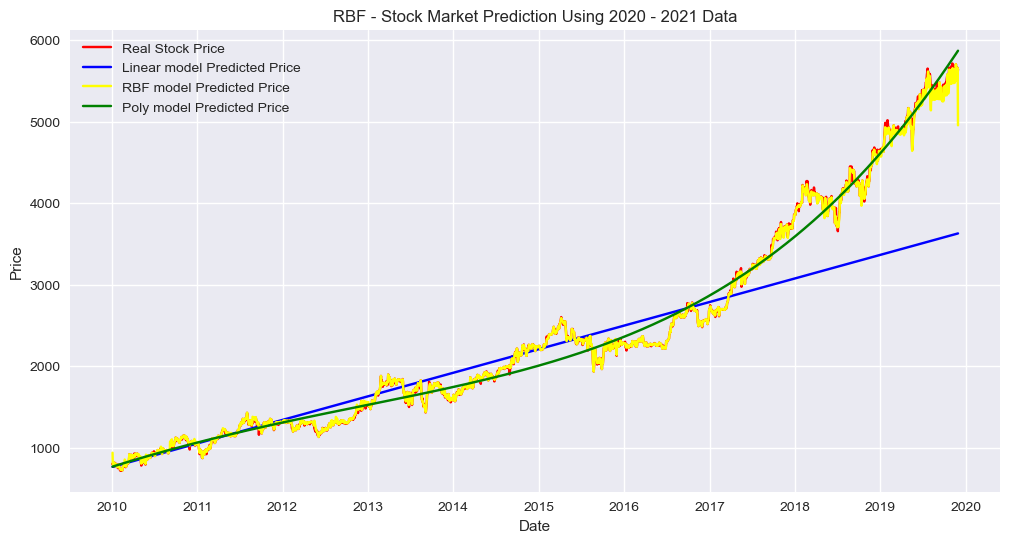

In [25]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2020 - 2021 Data')
plt.plot(test_dates_data, test_prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(test_actual_dates, SVR_linear_test, color= 'blue', label= 'Linear model Predicted Price')
plt.plot(test_actual_dates, SVR_rbfk_test, color= 'yellow', label= 'RBF model Predicted Price')
plt.plot(test_actual_dates, SVR_poly_test, color= 'green', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("SVR RBF Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_rbfk_train)))

print("SVR RBF Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_rbfk_train))

print("SVR RBF Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_rbfk_train))

print("SVR RBF Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_rbfk_test)))

print("SVR RBF Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_rbfk_test))

print("SVR RBF Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_rbfk_test))


SVR RBF Train RMSE: 12.00
SVR RBF Train R2 Score: 1.00
SVR RBF Train MAE Score: 3.94
SVR RBF Test RMSE: 32.14
SVR RBF Test R2 Score: 1.00
SVR RBF Test MAE Score: 11.33


In [27]:
print("SVR Linear Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_linear_train)))

print("SVR Linear Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_linear_train))

print("SVR Linear Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_linear_train))

print("SVR Linear Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_linear_test)))

print("SVR Linear Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_linear_test))

print("SVR Linear Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_linear_test))

SVR Linear Train RMSE: 486.32
SVR Linear Train R2 Score: 0.86
SVR Linear Train MAE Score: 352.54
SVR Linear Test RMSE: 647.35
SVR Linear Test R2 Score: 0.76
SVR Linear Test MAE Score: 388.13


In [28]:
print("SVR Poly Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_poly_train)))

print("SVR Poly Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_poly_train))

print("SVR Poly Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_poly_train))

print("SVR Poly Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_poly_test)))

print("SVR Poly Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_poly_test))

print("SVR Poly Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_poly_test))

SVR Poly Train RMSE: 161.60
SVR Poly Train R2 Score: 0.99
SVR Poly Train MAE Score: 122.26
SVR Poly Test RMSE: 159.62
SVR Poly Test R2 Score: 0.99
SVR Poly Test MAE Score: 121.26
